### importation

In [27]:
import cv2

In [28]:
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

### 1. Read in Image, Grayscale and Blur

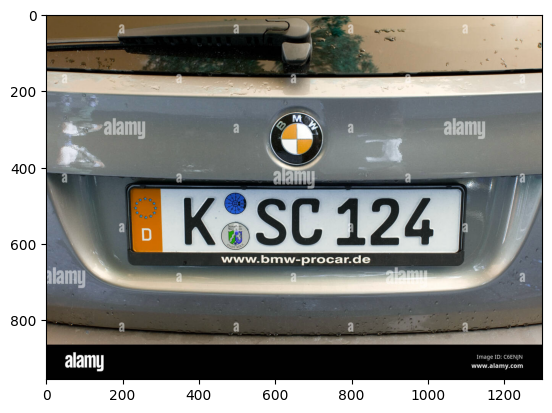

In [29]:
img = cv2.imread('../images/image_2.jpg')
plt.imshow(img)

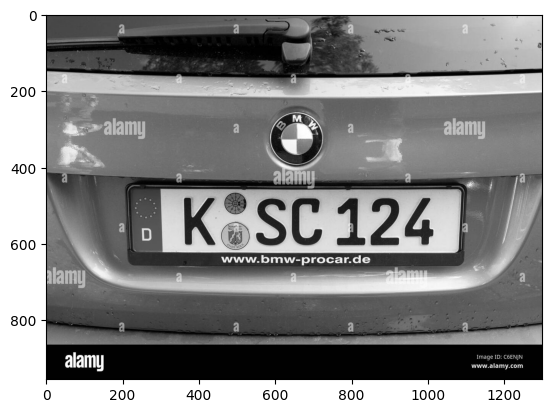

In [30]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

### 2. Apply filter and find edges for localization

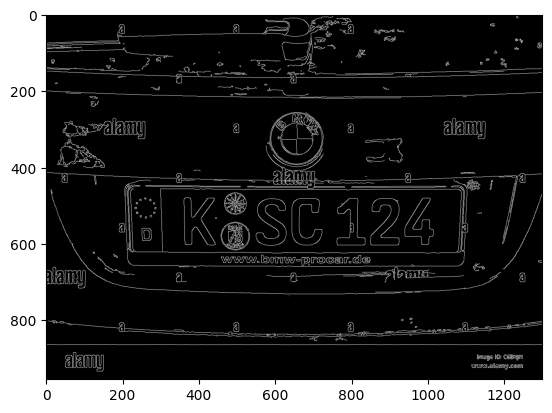

In [31]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

### 3. Find Contours and Apply

In [32]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [33]:
contours

[array([[[ 300,  457]],
 
        [[ 300,  479]],
 
        [[ 301,  480]],
 
        [[ 301,  510]],
 
        [[ 302,  511]],
 
        [[ 302,  540]],
 
        [[ 303,  541]],
 
        [[ 303,  567]],
 
        [[ 304,  568]],
 
        [[ 304,  597]],
 
        [[ 305,  598]],
 
        [[ 305,  622]],
 
        [[ 319,  622]],
 
        [[ 320,  623]],
 
        [[ 407,  623]],
 
        [[ 408,  624]],
 
        [[ 444,  624]],
 
        [[ 445,  623]],
 
        [[ 534,  623]],
 
        [[ 535,  624]],
 
        [[ 591,  624]],
 
        [[ 592,  625]],
 
        [[ 617,  625]],
 
        [[ 618,  624]],
 
        [[ 705,  624]],
 
        [[ 706,  625]],
 
        [[ 725,  625]],
 
        [[ 726,  624]],
 
        [[ 770,  624]],
 
        [[ 771,  625]],
 
        [[ 789,  625]],
 
        [[ 790,  624]],
 
        [[ 829,  624]],
 
        [[ 830,  625]],
 
        [[ 831,  624]],
 
        [[ 992,  624]],
 
        [[ 993,  625]],
 
        [[1008,  625]],
 
        [[10

In [42]:
for contour in contours:
    approx = cv2.approxPolyDP(contour, 30, True)

In [43]:
approx

array([[[590, 482]],

       [[629, 579]],

       [[582, 605]],

       [[550, 576]],

       [[610, 571]],

       [[554, 506]]], dtype=int32)

In [25]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [26]:
approx

array([[[ 300,  457]],

       [[ 305,  622]],

       [[1081,  616]],

       [[1082,  458]]], dtype=int32)

In [12]:
location

array([[[ 300,  457]],

       [[ 305,  622]],

       [[1081,  616]],

       [[1082,  458]]], dtype=int32)

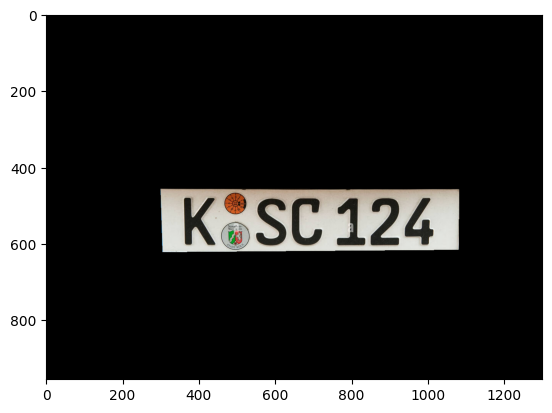

In [13]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [14]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

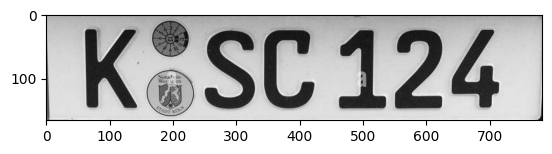

In [15]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

### 4. Use Easy OCR To Read Text

In [16]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[48, 14], [168, 14], [168, 156], [48, 156]], 'K', 0.9841809261110122),
 ([[239, 9], [731, 9], [731, 166], [239, 166]], 'SC 124', 0.8105841640793369)]

### 5. Render result

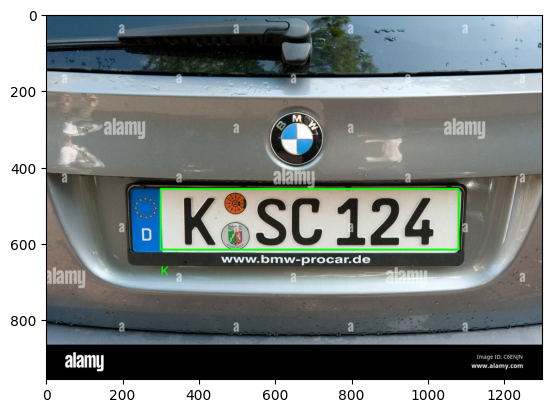

In [17]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))